In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dir_path = '/Users/kessapassa/OneDrive - 神奈川工科大学/Laboratory/修論/files/'
dir_path += '染谷/'
file_name = '5分前_201808080204_2020-02-10_13-24-28'
path = dir_path + file_name + '.txt'

In [3]:
# A1:筋電位(emg), A2:心電図(ecg), A3:皮膚電気活動(eda), A4:脳波(eeg)
columns = ["nSeq", "I1", "I2", "O1", "O2", "A1", "A2", "A3", "A4", "A5", "A6"]
sampling_rate = 1000

df = None
reader = pd.read_csv(path, sep='\t', header=None, names=columns, index_col=False, chunksize=600*sampling_rate)
for r in reader:
    if df is None:
        #  頭から3行目は要らない
        df = r.drop([i for i in range(3)])
    else:
        df = df.append(r, ignore_index=True)
        
df = df.reset_index(drop=True)

print(df.shape)
print('{}分{:.2f}秒'.format(df.shape[0]//sampling_rate//60, df.shape[0]/sampling_rate%60))
df.head()

(244200, 11)
4分4.20秒


/Users/kessapassa/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,nSeq,I1,I2,O1,O2,A1,A2,A3,A4,A5,A6
0,0,0.0,0.0,0.0,0.0,513.0,903.0,753.0,4.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,514.0,901.0,753.0,4.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,511.0,900.0,753.0,4.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,514.0,899.0,752.0,3.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,512.0,899.0,753.0,4.0,0.0,0.0


In [15]:
target='A2'
start_minite = 3.0
end_minite = 3.2

start_time = int(sampling_rate * 60 * start_minite)
end_time = int(sampling_rate * 60 * end_minite)
df_target = df[target][start_time:end_time]
# df_target = df[target]

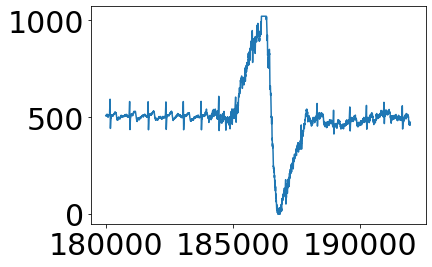

In [16]:
plt.plot(df_target)

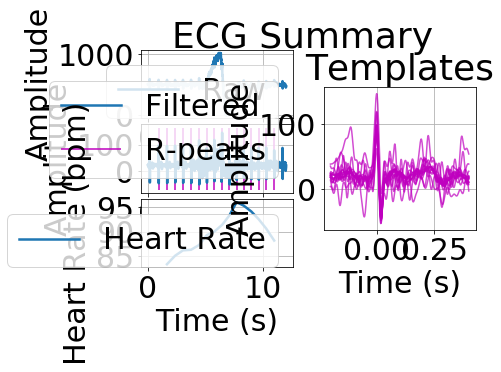

In [17]:
from biosppy import storage
from biosppy.signals import ecg

out = ecg.ecg(signal=df_target.values, sampling_rate=sampling_rate)

In [18]:
out.keys()

['ts',
 'filtered',
 'rpeaks',
 'templates_ts',
 'templates',
 'heart_rate_ts',
 'heart_rate']

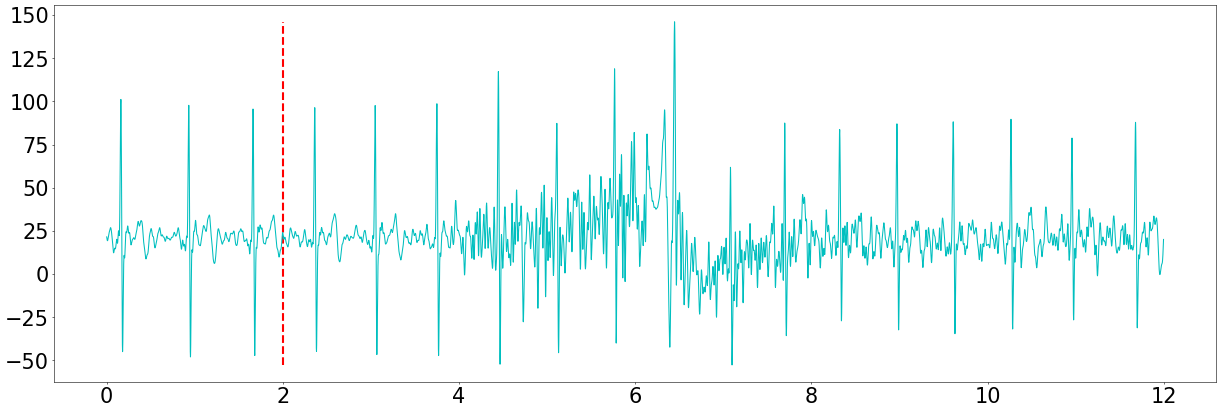

In [19]:
plt.figure(figsize=(30, 10), dpi=50)
plt.rcParams["font.size"] = 30
# plt.title('筋電位')
plt.plot(out['ts'], out['filtered'], 'c')
plt.vlines(2, out['filtered'].min(), out['filtered'].max(), 'red', linestyles='dashed', lw=3)
plt.savefig(dir_path.split('/')[-2]+'_ecg.png')

In [20]:
import sys
sys.path.append('./')
from common import Common

/Users/kessapassa/opt/anaconda3/lib/python3.7/site-packages/biosppy/plotting.py:960: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  gs.tight_layout(fig)


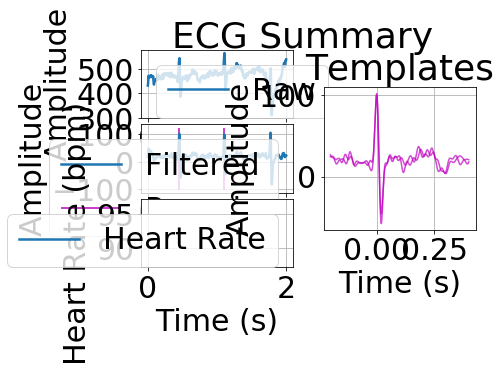

In [10]:
train =df[target][10000:12000].values
train_out = ecg.ecg(signal=train, sampling_rate=sampling_rate)
train_data = train_out['filtered']

In [11]:
# train_data =df[target][10000:12000].values
# test_data = out['filtered']
# test_data = df_target.values
test_data = out['filtered']
c = Common(train_data, test_data)

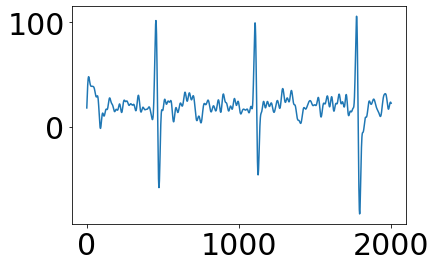

In [12]:
plt.plot(train_data)

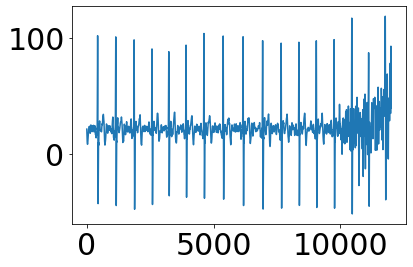

In [13]:
plt.plot(test_data)

In [14]:
v

NameError: name 'v' is not defined

In [ ]:
c.k_neighborhood()

In [ ]:
c.ssa(width=100)